## Введение в обработку естественного языка
### Урок 5. Part-of-Speech разметка, NER, извлечение отношений

In [1]:
from IPython.core.display import display, HTML, Image
display(HTML("<style>.container { width:77% !important; }</style>"))

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# !pip install pyconll

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pyconll

import nltk
from nltk.corpus import brown
from nltk.tag import DefaultTagger
from nltk.tag import UnigramTagger
from nltk.tag import BigramTagger, TrigramTagger
from nltk.tag import RegexpTagger

### Загрузка данных

### Практическое задание 1

**Написать теггер на данных с руским языком**

### 1. проверить UnigramTagger, BigramTagger, TrigramTagger и их комбинации  

In [13]:
# Комбинация тэггеров
# Примущество Backoff Tagging в том, что если текущий тэггер не знает, как тэггировать слово, 
# он передает это следующему и так далее, пока не пройдет перебор по всем тэггерам. 
# В данному случае тэггирование производит последовательность UnigramTagger, BigramTagger, TrigramTagger. 
# Комбинация тэггеров дала немного лучший результат, чем UnigramTagger, BigramTagger по отдельности.
def backoff_tagger(train_sents, tagger_classes, backoff=None):
    for cls in tagger_classes:
        backoff = cls(train_sents, backoff=backoff)
    return backoff

In [19]:
tts = 0.25 # train_test_split
models = []

models.append(('UnigramTagger', UnigramTagger([train_data[:int(len(train_data) * tts)]])))
models.append(('BigramTagger', BigramTagger([train_data[:int(len(train_data) * tts)]])))
models.append(('TrigramTagger', TrigramTagger([train_data[:int(len(train_data) * tts)]])))
models.append(('CombineTagger', backoff_tagger([train_data[:int(len(train_data) * tts)]], [UnigramTagger, BigramTagger, TrigramTagger])))

In [20]:
results = []

for name, model in models:
    accuracy = model.evaluate([test_data])
    results.append((name, accuracy))
  
best_tagger = pd.DataFrame(results, columns = ['model','accuracy'])
best_tagger.sort_values('accuracy', ascending=False)

,model,accuracy
3,CombineTagger,0.812751
0,UnigramTagger,0.807704
1,BigramTagger,0.575388
2,TrigramTagger,0.020347


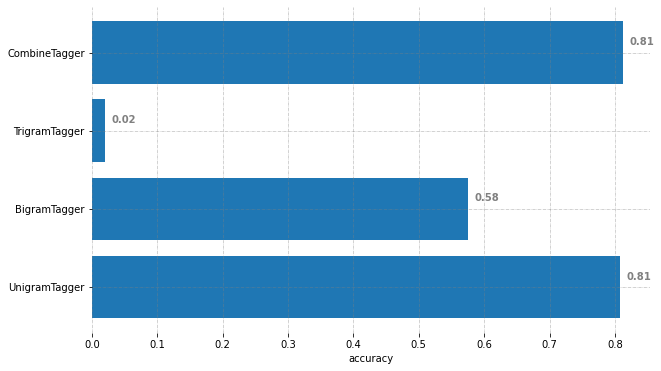

In [22]:
x = best_tagger['model']
y = best_tagger['accuracy']

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(x, y)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Add x, y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.7)

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.01, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='grey')

plt.xlabel('accuracy')
plt.show()